## Importing The Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### BUSINESS PROBLEM:
In order to effectively produce quality decisions in the modern credit card industry, knowledge 
must be gained through effective data analysis and modeling. Through the use of dynamic datadriven decision-making tools and procedures, information can be gathered to successfully evaluate 
all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries 
across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and 
collections, respond to customer requests for help with proactive offers and service

#### Importing the Data

In [91]:
customer_acq=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
transaction=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\spend.csv")
repay=pd.read_csv(r"C:\sayan\data science interview\course\Python\projects\Python foundation\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Repayment.csv")

In [92]:
customer_acq.sample(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
93,94,A94,31,COCHIN,Gold,500000.0,C17,Govt
6,7,A7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
60,61,A61,44,COCHIN,Gold,500000.0,C23,Govt
29,30,A30,25,BANGALORE,Gold,500000.0,C12,Govt
38,39,A39,78,TRIVANDRUM,Platimum,500000.0,C21,Salaried_MNC


In [93]:
customer_acq['Product']=np.where(customer_acq.Product=='Platimum','Platinum',customer_acq.Product)

In [165]:
customer_acq.sample(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
82,83,A83,37,COCHIN,Platinum,10002.0,C6,Govt
6,7,A7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
98,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed
59,60,A60,28,CALCUTTA,Gold,500000.0,C22,Salaried_Pvt
5,6,A6,70,DELHI,Silver,100000.0,C6,Self Employed


In [94]:
customer_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [95]:
transaction.sample(5)

,Sl No:,Customer,Month,Type,Amount
49,50,A50,3-Aug-05,CAMERA,315690.47
825,826,A32,3-Sep-06,MOVIE TICKET,27775.52
744,745,A38,1-Apr-06,RENTAL,407739.24
555,556,A13,23-Feb-05,PETRO,95830.82
928,929,A48,3-Mar-06,AUTO,65503.17


In [96]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [97]:
repay.sample(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
1124,1125.0,A56,3-Nov-06,310371.26,NaN
1254,1255.0,A41,3-Apr-06,147383.00,NaN
121,122.0,A6,4-Feb-06,387298.06,NaN
1266,1267.0,A53,25-Jan-04,11268.50,NaN
1151,1152.0,A54,2-Apr-06,337247.97,NaN


In [98]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


### Data Cleaning

In [99]:
transaction['Month']=pd.to_datetime(transaction.Month,format='%d-%b-%y')

In [100]:
transaction.columns=['Sl_No', 'Customer', 'Month_tran', 'Type', 'Amount_tran']

In [101]:
transaction.sample(3)

,Sl_No,Customer,Month_tran,Type,Amount_tran
173,174,A2,2006-11-03,MOVIE TICKET,75728.35
1172,1173,A46,2006-03-24,SANDALS,395743.23
1076,1077,A37,2004-01-03,FOOD,259198.87


In [102]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sl_No        1500 non-null   int64         
 1   Customer     1500 non-null   object        
 2   Month_tran   1500 non-null   datetime64[ns]
 3   Type         1500 non-null   object        
 4   Amount_tran  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [103]:
repay.drop(columns='Unnamed: 4',inplace=True)

In [104]:
repay.dropna(inplace=True)

In [105]:
repay['Month']=pd.to_datetime(repay.Month,format='%d-%b-%y')

In [106]:
repay.columns=['SL_No', 'Customer', 'Month_repay', 'Amount_repay']

In [107]:
repay.SL_No=repay.SL_No.astype(np.int32)

In [108]:
repay.sample(3)

,SL_No,Customer,Month_repay,Amount_repay
77,78,A76,2005-02-03,265619.05
971,972,A33,2005-05-09,326761.68
615,616,A25,2005-08-12,1168.46


In [109]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 1 to 1499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SL_No         1499 non-null   int32         
 1   Customer      1499 non-null   object        
 2   Month_repay   1499 non-null   datetime64[ns]
 3   Amount_repay  1499 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 52.7+ KB


#### Merging the Data Set

In [110]:
#merging of customer_acq and transaction
merge_wrp=pd.merge(left=customer_acq,right=transaction,left_on='Customer',
                   right_on='Customer')
merge_wrp.drop(columns=['No','Sl_No'],inplace=True)
merge_wrp

,Customer,Age,City,Product,Limit,Company,Segment,Month_tran,Type,Amount_tran
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


In [111]:
#merging of customer_acq and repay
merge_rp=pd.merge(left=customer_acq,right=repay,left_on='Customer',
                  right_on='Customer')
merge_rp.drop(columns=['No','SL_No'],inplace=True)
merge_rp

,Customer,Age,City,Product,Limit,Company,Segment,Month_repay,Amount_repay
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,365366.62
...,...,...,...,...,...,...,...,...,...
1494,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1495,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,121874.90
1496,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1497,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [112]:
#merging of customer_acq,transaction and repay
final_data=pd.merge(left=merge_wrp,right=repay,left_on='Customer',
                    right_on='Customer')
final_data.drop(columns=['SL_No'],inplace=True)
final_data

,Customer,Age,City,Product,Limit,Company,Segment,Month_tran,Type,Amount_tran,Month_repay,Amount_repay
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2005-02-23,365366.62
...,...,...,...,...,...,...,...,...,...,...,...,...
37261,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30
37262,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26,2004-01-12,121874.90
37263,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06,2004-01-03,337815.57
37264,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22,2004-01-15,25682.73


Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the 
customers spend & repayment behavior.


### 1a. In the above dataset,
In case age is less than 18, replace it with mean of age values.

In [113]:
#Mean Age
customer_acq.Age.mean()

46.49

In [114]:
#changing age
final_data['Age']=np.where(final_data.Age<18,customer_acq.Age.mean(),
                           final_data.Age)
final_data.sample(3)

,Customer,Age,City,Product,Limit,Company,Segment,Month_tran,Type,Amount_tran,Month_repay,Amount_repay
26590,A45,67.0,COCHIN,Gold,500000.0,C7,Salaried_Pvt,2005-05-24,BUS TICKET,393767.30,2004-01-15,195249.70
31476,A52,50.0,BANGALORE,Platinum,100002.0,C14,Normal Salary,2004-02-05,CLOTHES,290123.86,2004-01-15,63849.18
12636,A26,38.0,PATNA,Gold,500000.0,C8,Normal Salary,2005-04-04,TRAIN TICKET,470973.98,2004-01-03,161220.05


### 1b. In the above dataset,
In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [115]:
merge_wrp['amount_tran_new']=np.where(merge_wrp.Amount_tran>merge_wrp.Limit,
                                        (merge_wrp.Limit/2),merge_wrp.Amount_tran)

In [116]:
merge_wrp.sample(5)

,Customer,Age,City,Product,Limit,Company,Segment,Month_tran,Type,Amount_tran,amount_tran_new
1457,A65,41,COCHIN,Gold,500000.0,C27,Salaried_Pvt,2004-01-12,CAR,177417.81,177417.81
1106,A47,28,CHENNAI,Platinum,10000.0,C9,Normal Salary,2005-05-26,RENTAL,388218.55,5000.00
825,A38,47,CHENNAI,Platinum,500000.0,C20,Self Employed,2006-03-23,CLOTHES,240838.12,240838.12
829,A38,47,CHENNAI,Platinum,500000.0,C20,Self Employed,2006-03-30,FOOD,338873.06,338873.06
588,A28,36,TRIVANDRUM,Gold,500000.0,C10,Salaried_MNC,2006-05-08,AUTO,66432.37,66432.37


### 1c. In the above dataset,
Incase the repayment amount is more than the limit, replace the repayment with the 
limit.


In [117]:
final_data['amount_repay_new']=np.where(final_data.Amount_repay>final_data.Limit,
                                      final_data.Limit,final_data.Amount_repay)

In [118]:
final_data.sample(6)

,Customer,Age,City,Product,Limit,Company,Segment,Month_tran,Type,Amount_tran,Month_repay,Amount_repay,amount_repay_new
35996,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,2004-01-03,CAMERA,213221.11,2006-03-25,173324.28,173324.28
14125,A28,36.0,TRIVANDRUM,Gold,500000.0,C10,Salaried_MNC,2005-05-26,AIR TICKET,264368.37,2004-01-15,26178.74,26178.74
26997,A46,49.0,PATNA,Silver,100000.0,C8,Govt,2004-01-25,MOVIE TICKET,19186.72,2004-01-12,148034.60,100000.00
20678,A39,78.0,TRIVANDRUM,Platinum,500000.0,C21,Salaried_MNC,2004-05-05,RENTAL,197783.17,2006-03-31,343055.92,343055.92
11084,A24,53.0,DELHI,Silver,100002.0,C6,Salaried_Pvt,2004-01-15,PETRO,224361.64,2006-11-21,103932.90,100002.00
10255,A22,27.0,BOMBAY,Silver,100000.0,C22,Self Employed,2006-06-03,BUS TICKET,51202.64,2005-05-07,487674.89,100000.00


### 2a. From the above dataset create the following summaries:
How many distinct customers exist?

In [119]:
customer_acq.Customer.nunique()

100

### 2b. From the above dataset create the following summaries:
How many distinct categories exist?


In [120]:
#The number customers from different segments
customer_acq.Segment.value_counts()

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

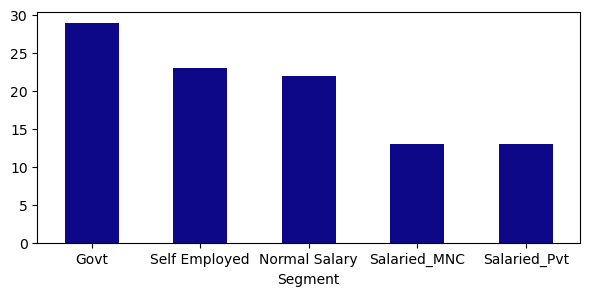

In [121]:
customer_acq.Segment.value_counts().plot(kind='bar',colormap='plasma',
                                         figsize=(7,3),rot=0)
plt.show()

In [122]:
#The number customers using different products
customer_acq.Product.value_counts()

Product
Gold        38
Platinum    32
Silver      30
Name: count, dtype: int64

<Axes: xlabel='Product'>

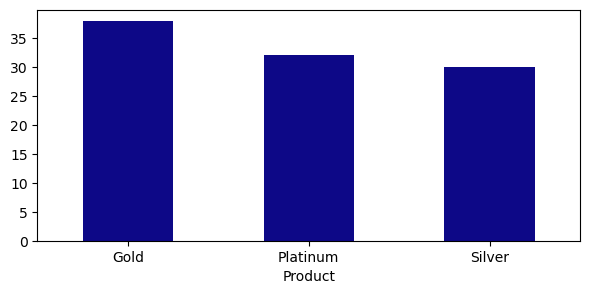

In [123]:
customer_acq.Product.value_counts().plot(kind='bar',colormap='plasma',
                                         figsize=(7,3),rot=0)

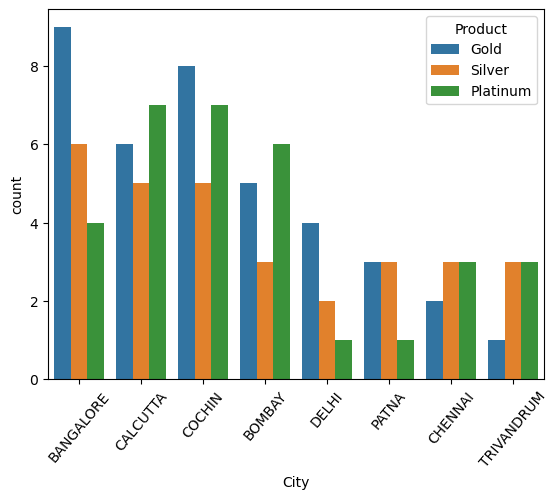

In [124]:
#customer using products wrt city
sns.countplot(data=customer_acq,x='City',hue='Product')
plt.xticks(rotation=50)
plt.show()

#Customers using Gold and Silver products are from Bangalore Majorly
#Customers using Platinum products are from Bangalore and Cochin Majorly

#Customers using Gold products are least from Trivandrum
#Customers using Silver products are least from Delhi
#Customers using Platinum products are least from Delhi and Patna

In [125]:
#then number of different types of transactions
transaction.Type.value_counts()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: count, dtype: int64

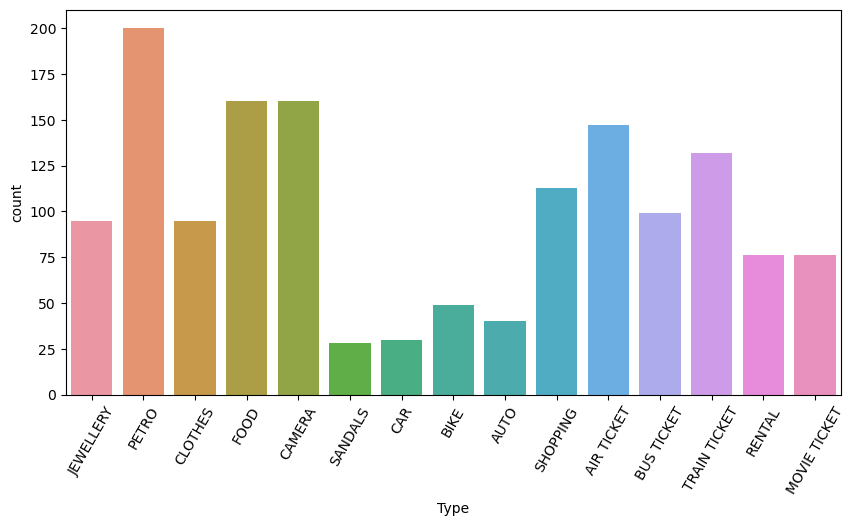

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(data=transaction,x='Type')
plt.xticks(rotation=60)
plt.show()

### 2c. From the above dataset create the following summaries:
What is the average monthly spend by customers?


In [127]:
merge_wrp['month_name']=merge_wrp.Month_tran.apply(lambda x: x.month_name())
merge_wrp['year']=merge_wrp.Month_tran.apply(lambda x: x.year)
merge_wrp.pivot_table(index=['year','month_name'],values='Amount_tran', 
                      aggfunc='mean')

Amount_tran
year month_name               
2004 April       235272.037143
     February    221215.270000
     January     251712.068664
     March       232146.119286
     May         217539.236429
     November    270486.397857
     September   310923.383571
2005 April       252181.326429
     August      233734.634286
     December    147503.060000
     February    229802.279821
     January     292741.372857
     July        229116.663571
     June        262688.112857
     May         245696.515429
     November    286143.322857
     October     194568.640714
     September   188666.202143
2006 April       232468.967553
     August      240699.717143
     December    270470.980714
     February    253858.260714
     January     282058.006429
     July        287505.098929
     June        177252.386429
     March       247166.084654
     May         236162.740357
     November    182841.290000
     October     236136.335000
     September   158520.090714

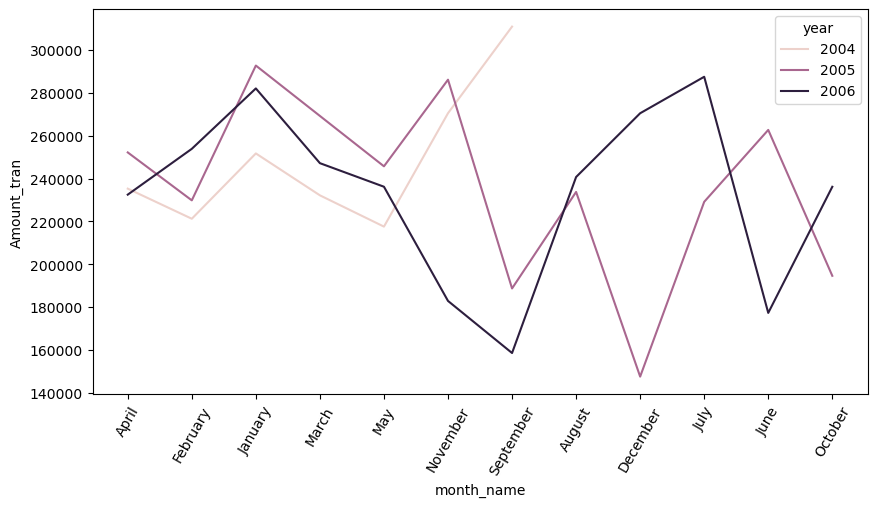

In [128]:
index_change=merge_wrp.pivot_table(index=['year','month_name'],
                                   values='Amount_tran', aggfunc='mean')
plotting=index_change.reset_index()


plt.figure(figsize=(10,5))
sns.lineplot(data=plotting,x='month_name',y='Amount_tran',hue='year')
plt.xticks(rotation=60)
plt.show()

#trends showing average spends of each month in each year

### 2d. From the above dataset create the following summaries:
What is the average monthly repayment by customers?

In [129]:
merge_rp['month_name']=merge_rp.Month_repay.apply(lambda x: x.month_name())
merge_rp['year']=merge_rp.Month_repay.apply(lambda x: x.year)
merge_rp.pivot_table(index=['year','month_name'],values='Amount_repay', 
                     aggfunc='mean')

Amount_repay
year month_name               
2004 April       259141.679000
     February    256702.630741
     January     242586.692437
     March       252585.280667
     May         226162.720800
     November    209592.238000
     September   184487.848750
2005 April       212688.631333
     August      264430.921622
     December    320379.335833
     February    238829.265123
     January     240548.098148
     July        239871.479167
     June        210199.818333
     May         263207.367857
     November    256695.120000
     October     219849.956667
     September   247700.170000
2006 April       275472.251889
     August      224143.992500
     December    252736.569167
     February    284489.565128
     January     293475.389167
     July        257936.383243
     June        251990.453333
     March       240851.266814
     May         256920.884943
     November    199399.197407
     October     260765.480000
     September   262533.880833

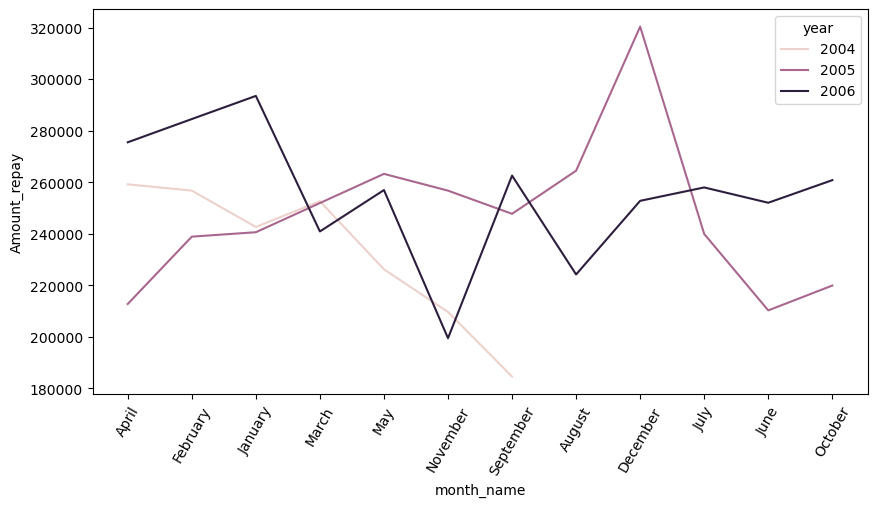

In [130]:
index_change2=merge_rp.pivot_table(index=['year','month_name'],
                                   values='Amount_repay', aggfunc='mean')
plotting2=index_change2.reset_index()


plt.figure(figsize=(10,5))
sns.lineplot(data=plotting2,x='month_name',y='Amount_repay',hue='year')
plt.xticks(rotation=60)
plt.show()

In [131]:
#directly we can take the data from transaction and repay and then can proceed
#but not doing karon amay abar month and all likhte hobe
#so am using the already made merged datas

In [132]:
index_change3=merge_wrp.pivot_table(index=['year','month_name'],
                                    values='Amount_tran', aggfunc='sum')
plotting3=index_change.reset_index()


index_change4=merge_rp.pivot_table(index=['year','month_name'],
                                   values='Amount_repay', aggfunc='sum')
plotting4=index_change2.reset_index()


In [133]:
plotting3['Amount_repay']=plotting4.Amount_repay

In [134]:
plotting3

,year,month_name,Amount_tran,Amount_repay
0,2004,April,235272.037143,259141.679000
1,2004,February,221215.270000,256702.630741
2,2004,January,251712.068664,242586.692437
3,2004,March,232146.119286,252585.280667
4,2004,May,217539.236429,226162.720800
5,2004,November,270486.397857,209592.238000
6,2004,September,310923.383571,184487.848750
7,2005,April,252181.326429,212688.631333
8,2005,August,233734.634286,264430.921622
9,2005,December,147503.060000,320379.335833


In [135]:
plotting3['Monthly_Profit_or_Loss']=plotting3.Amount_repay-plotting3.Amount_tran

In [136]:
plotting3['Interest']=np.where(plotting3.Monthly_Profit_or_Loss>0,
                               (plotting3.Monthly_Profit_or_Loss)*0.029,np.NaN)

In [137]:
#Interest earned
plotting3

,year,month_name,Amount_tran,Amount_repay,Monthly_Profit_or_Loss,Interest
0,2004,April,235272.037143,259141.679000,23869.641857,692.219614
1,2004,February,221215.270000,256702.630741,35487.360741,1029.133461
2,2004,January,251712.068664,242586.692437,-9125.376227,NaN
3,2004,March,232146.119286,252585.280667,20439.161381,592.735680
4,2004,May,217539.236429,226162.720800,8623.484371,250.081047
5,2004,November,270486.397857,209592.238000,-60894.159857,NaN
6,2004,September,310923.383571,184487.848750,-126435.534821,NaN
7,2005,April,252181.326429,212688.631333,-39492.695095,NaN
8,2005,August,233734.634286,264430.921622,30696.287336,890.192333
9,2005,December,147503.060000,320379.335833,172876.275833,5013.411999


### 2f. From the above dataset create the following summaries:
What are the top 5 product types?

In [138]:
prod_typ=merge_wrp.pivot_table(index='Type',values='Amount_tran',aggfunc='sum')

In [139]:
prod_typ.sort_values('Amount_tran',ascending=False)[0:5]

,Amount_tran
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


### 2g. From the above dataset create the following summaries:
Which city is having maximum spend?

In [140]:
city_typ=merge_wrp.pivot_table(index='City',values='Amount_tran',aggfunc='sum')
city_typ.sort_values('Amount_tran',ascending=False)[:1]

,Amount_tran
City,
COCHIN,73495349.26


### 2h. From the above dataset create the following summaries:
Which age group is spending more money?


In [141]:
age_typ=merge_wrp.pivot_table(index='Age',values='Amount_tran',aggfunc='sum')
age_typ.sort_values('Amount_tran',ascending=False)[:1]

,Amount_tran
Age,
28,25098877.03


### 2i. From the above dataset create the following summaries:
Who are the top 10 customers in terms of repayment?

In [142]:
customer_typ=merge_rp.pivot_table(index='Customer',values='Amount_repay',
                                  aggfunc='sum')
customer_typ.sort_values('Amount_repay',ascending=False)[:10]

,Amount_repay
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same

In [143]:
city_wise=merge_wrp.pivot_table(index=['City','year'],columns='Product',
                                values='Amount_tran',aggfunc='sum')

In [144]:
city_wise

Product                 Gold     Platinum      Silver
City       year                                      
BANGALORE  2004   9289878.54   6046763.93  6773901.65
           2005  12892362.99   7784194.68  3936068.22
           2006  12030611.09   5620904.86  4967945.66
BOMBAY     2004   6987853.53   5199581.00  3061805.08
           2005   8983018.28   5134074.48  2368375.97
           2006   7917144.31   7547549.72  3628864.37
CALCUTTA   2004   7477140.98   5961165.93  3321963.10
           2005  10303355.80   8810284.03  1285609.11
           2006  11167532.77  11305526.03  4783182.26
CHENNAI    2004   1059618.50   5558572.68  1156129.37
           2005   3740945.58   8868435.43  1000540.48
           2006   2704288.62   6921130.79  1665326.62
COCHIN     2004   7315850.15   8472832.23  4587738.70
           2005  12110613.03  10856722.82  2619231.25
           2006  10499142.38  12453968.83  4579249.87
DELHI      2004   2806495.00   1565199.90  4293224.28
           2005   1964845.27   2068490.16  2515127.59
           2006   2957103.32    764247.73  4581831.29
PATNA      2004   2072567.90   1113069.60  3398795.65
           2005   3252615.77   2883231.07  5244763.90
           2006   2276181.69   1256137.65  3111911.31
TRIVANDRUM 2004   2415102.84   3761433.87   795897.19
           2005   1240375.85   7186762.35  1445540.63
           2006   2735710.87   4174473.45  2005942.36

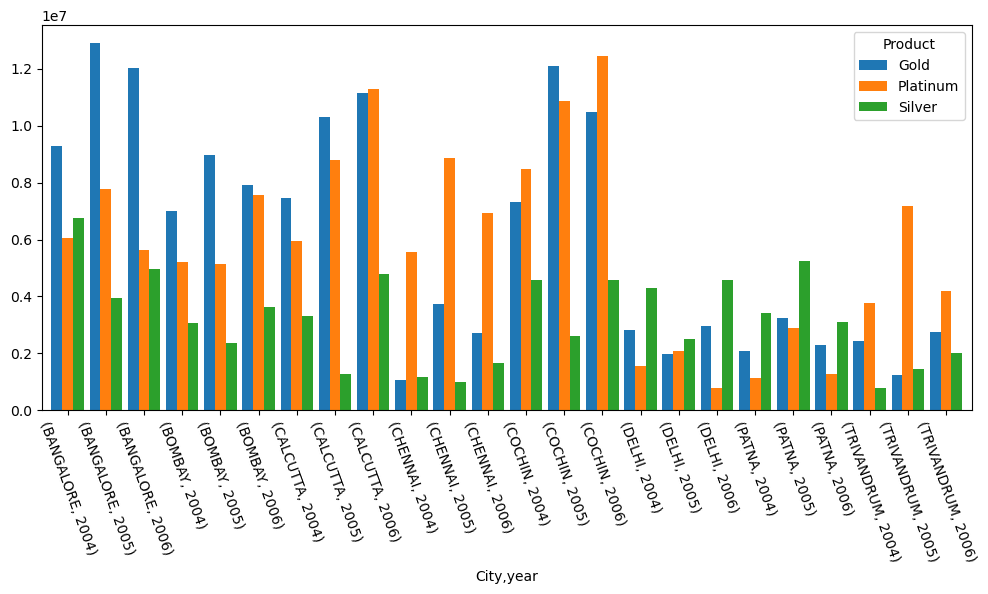

In [145]:
city_wise.plot(kind='bar',figsize=(12,5),width=0.85,rot=-70)
plt.show()

### 4a. Create graphs for
Monthly comparison of total spends, city wise


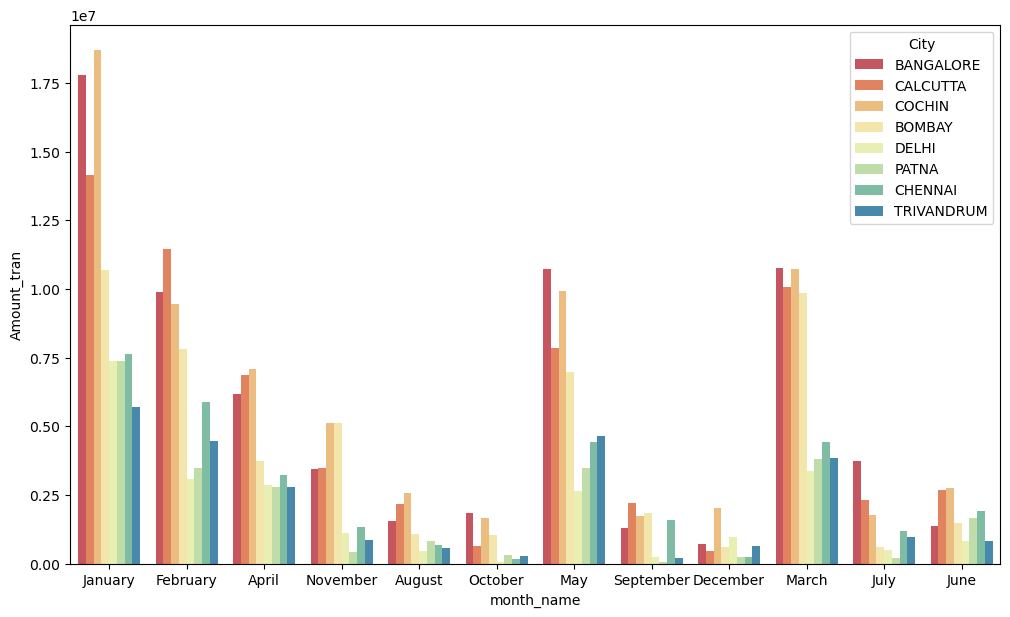

In [146]:
plt.figure(figsize=(12,7))
sns.barplot(data=merge_wrp,x='month_name',y='Amount_tran',
            errorbar=None,hue='City',
            estimator='sum',palette="Spectral")
plt.show()

#the order of cities spending in each month

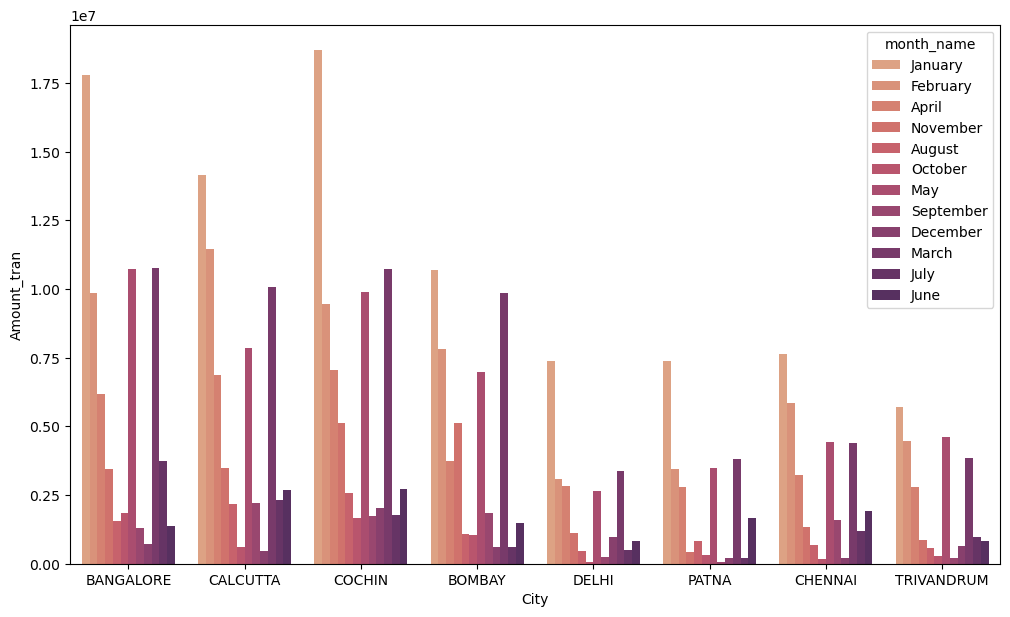

In [147]:
plt.figure(figsize=(12,7))
sns.barplot(data=merge_wrp,x='City',y='Amount_tran',
            errorbar=None,hue='month_name',
            estimator='sum',palette="flare",orient='v')
plt.show()

#the order of transaction in each city in a year

<Axes: xlabel='City'>

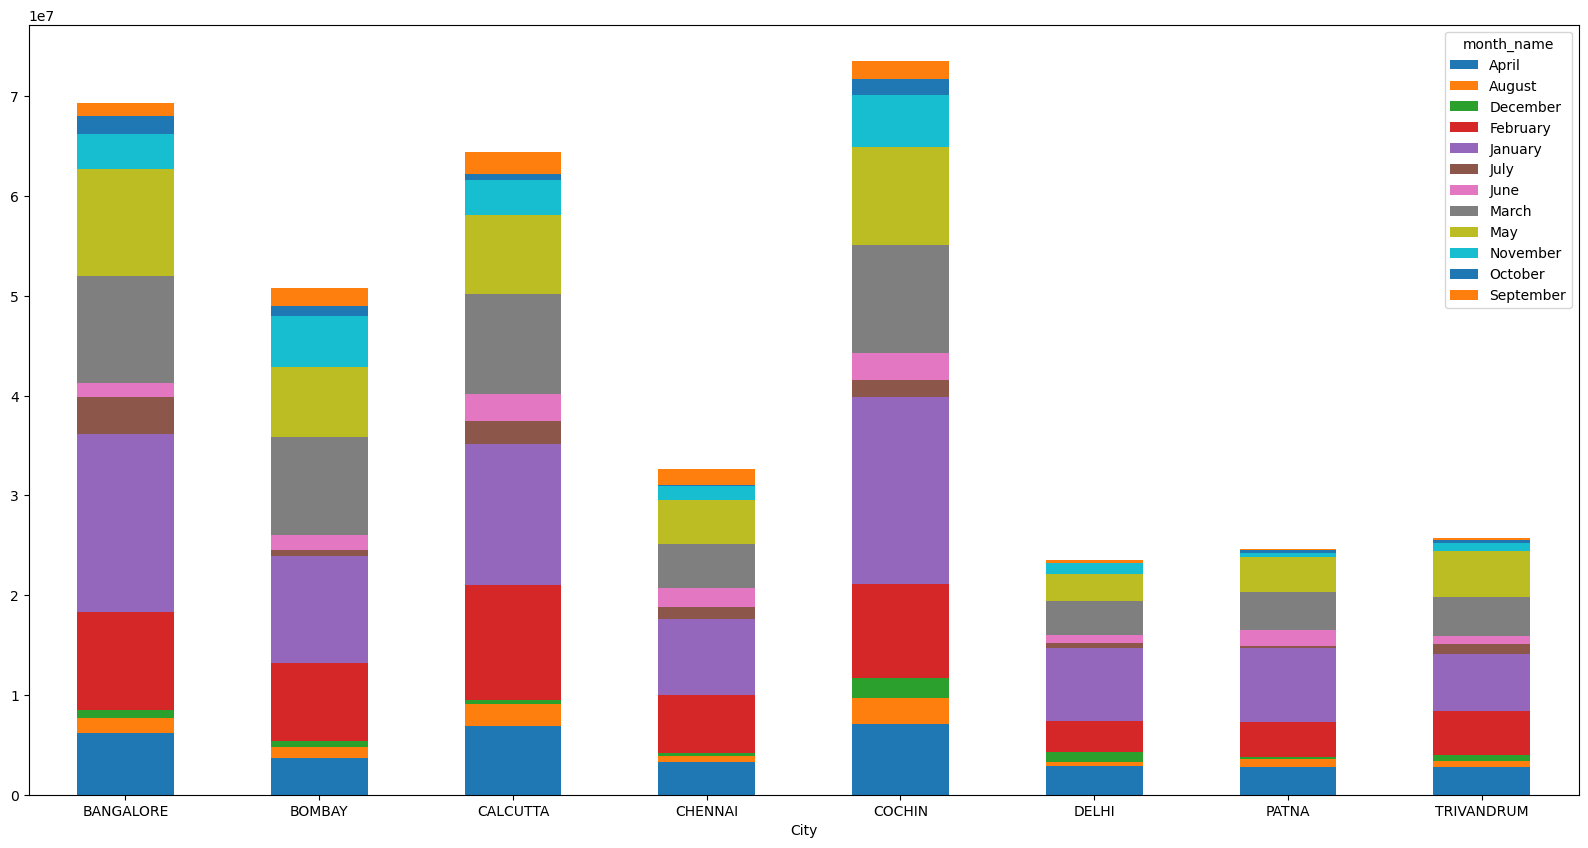

In [148]:
d=merge_wrp.pivot_table(index='City',columns='month_name',
                      values='Amount_tran',aggfunc='sum')
d.plot(kind='bar',stacked=True,figsize =(20,10),rot=0)
#total expenses by each city                                                               

### 4b. Create graphs for
Comparison of yearly spend on air tickets

In [149]:
air=merge_wrp.pivot_table(index='year',columns='Type',values='Amount_tran',aggfunc='sum')
air

Type,AIR TICKET,AUTO,BIKE,BUS TICKET,CAMERA,CAR,CLOTHES,FOOD,JEWELLERY,MOVIE TICKET,PETRO,RENTAL,SANDALS,SHOPPING,TRAIN TICKET
year,,,,,,,,,,,,,,,
2004,8370914.59,837121.32,880622.23,9352736.78,15808342.75,3458008.80,6869665.96,14331230.55,6491106.55,2749815.43,12406782.86,5005336.56,1611062.31,11240559.07,5079275.84
2005,14495718.73,1756945.98,5940943.34,9978368.34,14246199.07,74247.30,8089807.88,11679385.25,7067312.48,6706076.61,19045589.11,5840570.47,2286460.21,7458312.37,13829647.60
2006,10088812.10,5414016.74,4729540.02,5223682.85,11427030.14,3748068.79,9691628.65,11762722.63,8683977.93,10188937.89,18410802.12,6103320.41,2513730.80,9511483.07,14158153.71


<Axes: xlabel='year'>

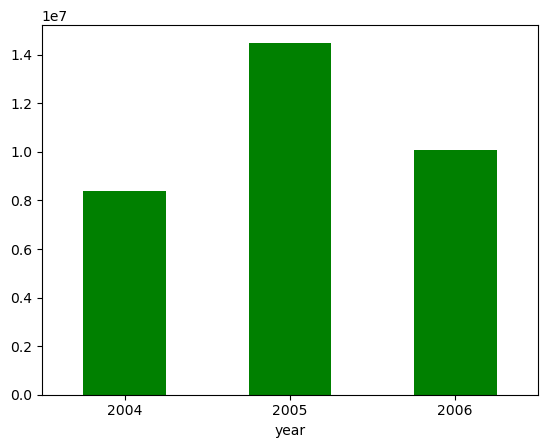

In [150]:
air.iloc[:,0].plot(kind='bar',rot=0,color="Green")

### 4c. Create graphs for
Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)


In [151]:
merge_wrp.month_name.unique()

array(['January', 'February', 'April', 'November', 'August', 'October',
       'May', 'September', 'December', 'March', 'July', 'June'],
      dtype=object)

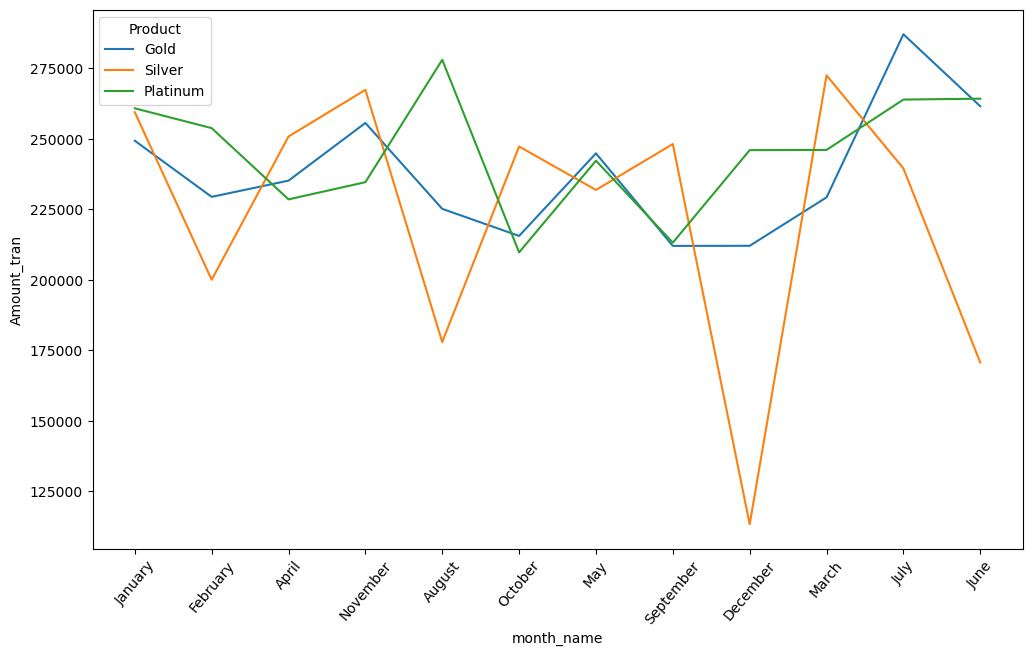

In [152]:
plt.figure(figsize=(12,7))
sns.lineplot(data=merge_wrp,x='month_name',y='Amount_tran',hue='Product',
             errorbar=None)
plt.xticks(rotation=50)
plt.show()

C:\Users\SG.SAYANPC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


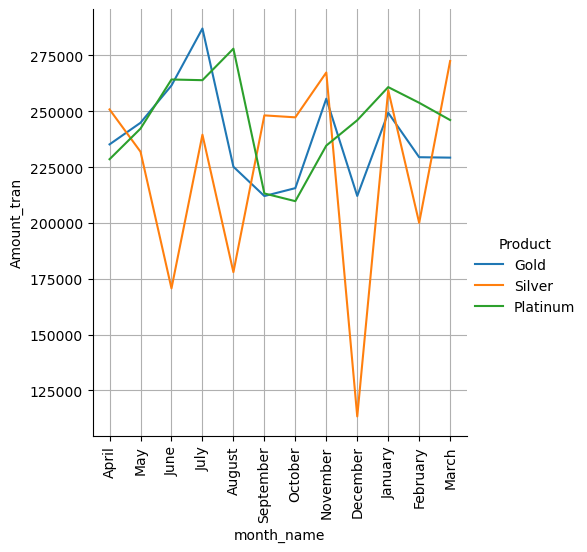

In [153]:
months = ['April','May','June','July', 'August','September', 
          'October','November','December','January', 'February','March']
cat = pd.CategoricalDtype(months, ordered=True)

sns.relplot(data=merge_wrp.astype({'month_name': cat}),
            x='month_name', y='Amount_tran', hue='Product',
            kind='line', errorbar=None)

plt.xticks(rotation=90)
plt.grid()
plt.show()

#PLATINUM AND GOLD CARD HOLDERS SPENDS MORE THAN SILVER THROUGHOUT THE YEAR
#PEAK SEASON FOR GOLD CARD HOLDER ARE JULY,NOV AND JANUARY
#PEAK SEASON FOR SILVER CARD HOLDER ARE APRIL, JULY ,SEPT-OCT ,NOV,JAN AND MARCH
#PEAK SEASON FOR PLATNUM CARD HOLDER ARE JUNE-JULY,AUG AND JANUARY

#JAN AND JULY IS COMMON IN ALL CASES..GENERALLY PEOPLE SPEND IN THESE DAYS

In [154]:
a=merge_wrp[merge_wrp.Type.isin(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA'])]
b=merge_wrp[merge_wrp.Type.isin(['SANDALS','CAR', 'TRAIN TICKET', 'BUS TICKET', 'AIR TICKET'])]
c=merge_wrp[merge_wrp.Type.isin(['MOVIE TICKET','RENTAL', 'BIKE', 'AUTO', 'SHOPPING'])]

<Axes: xlabel='month_name', ylabel='Amount_tran'>

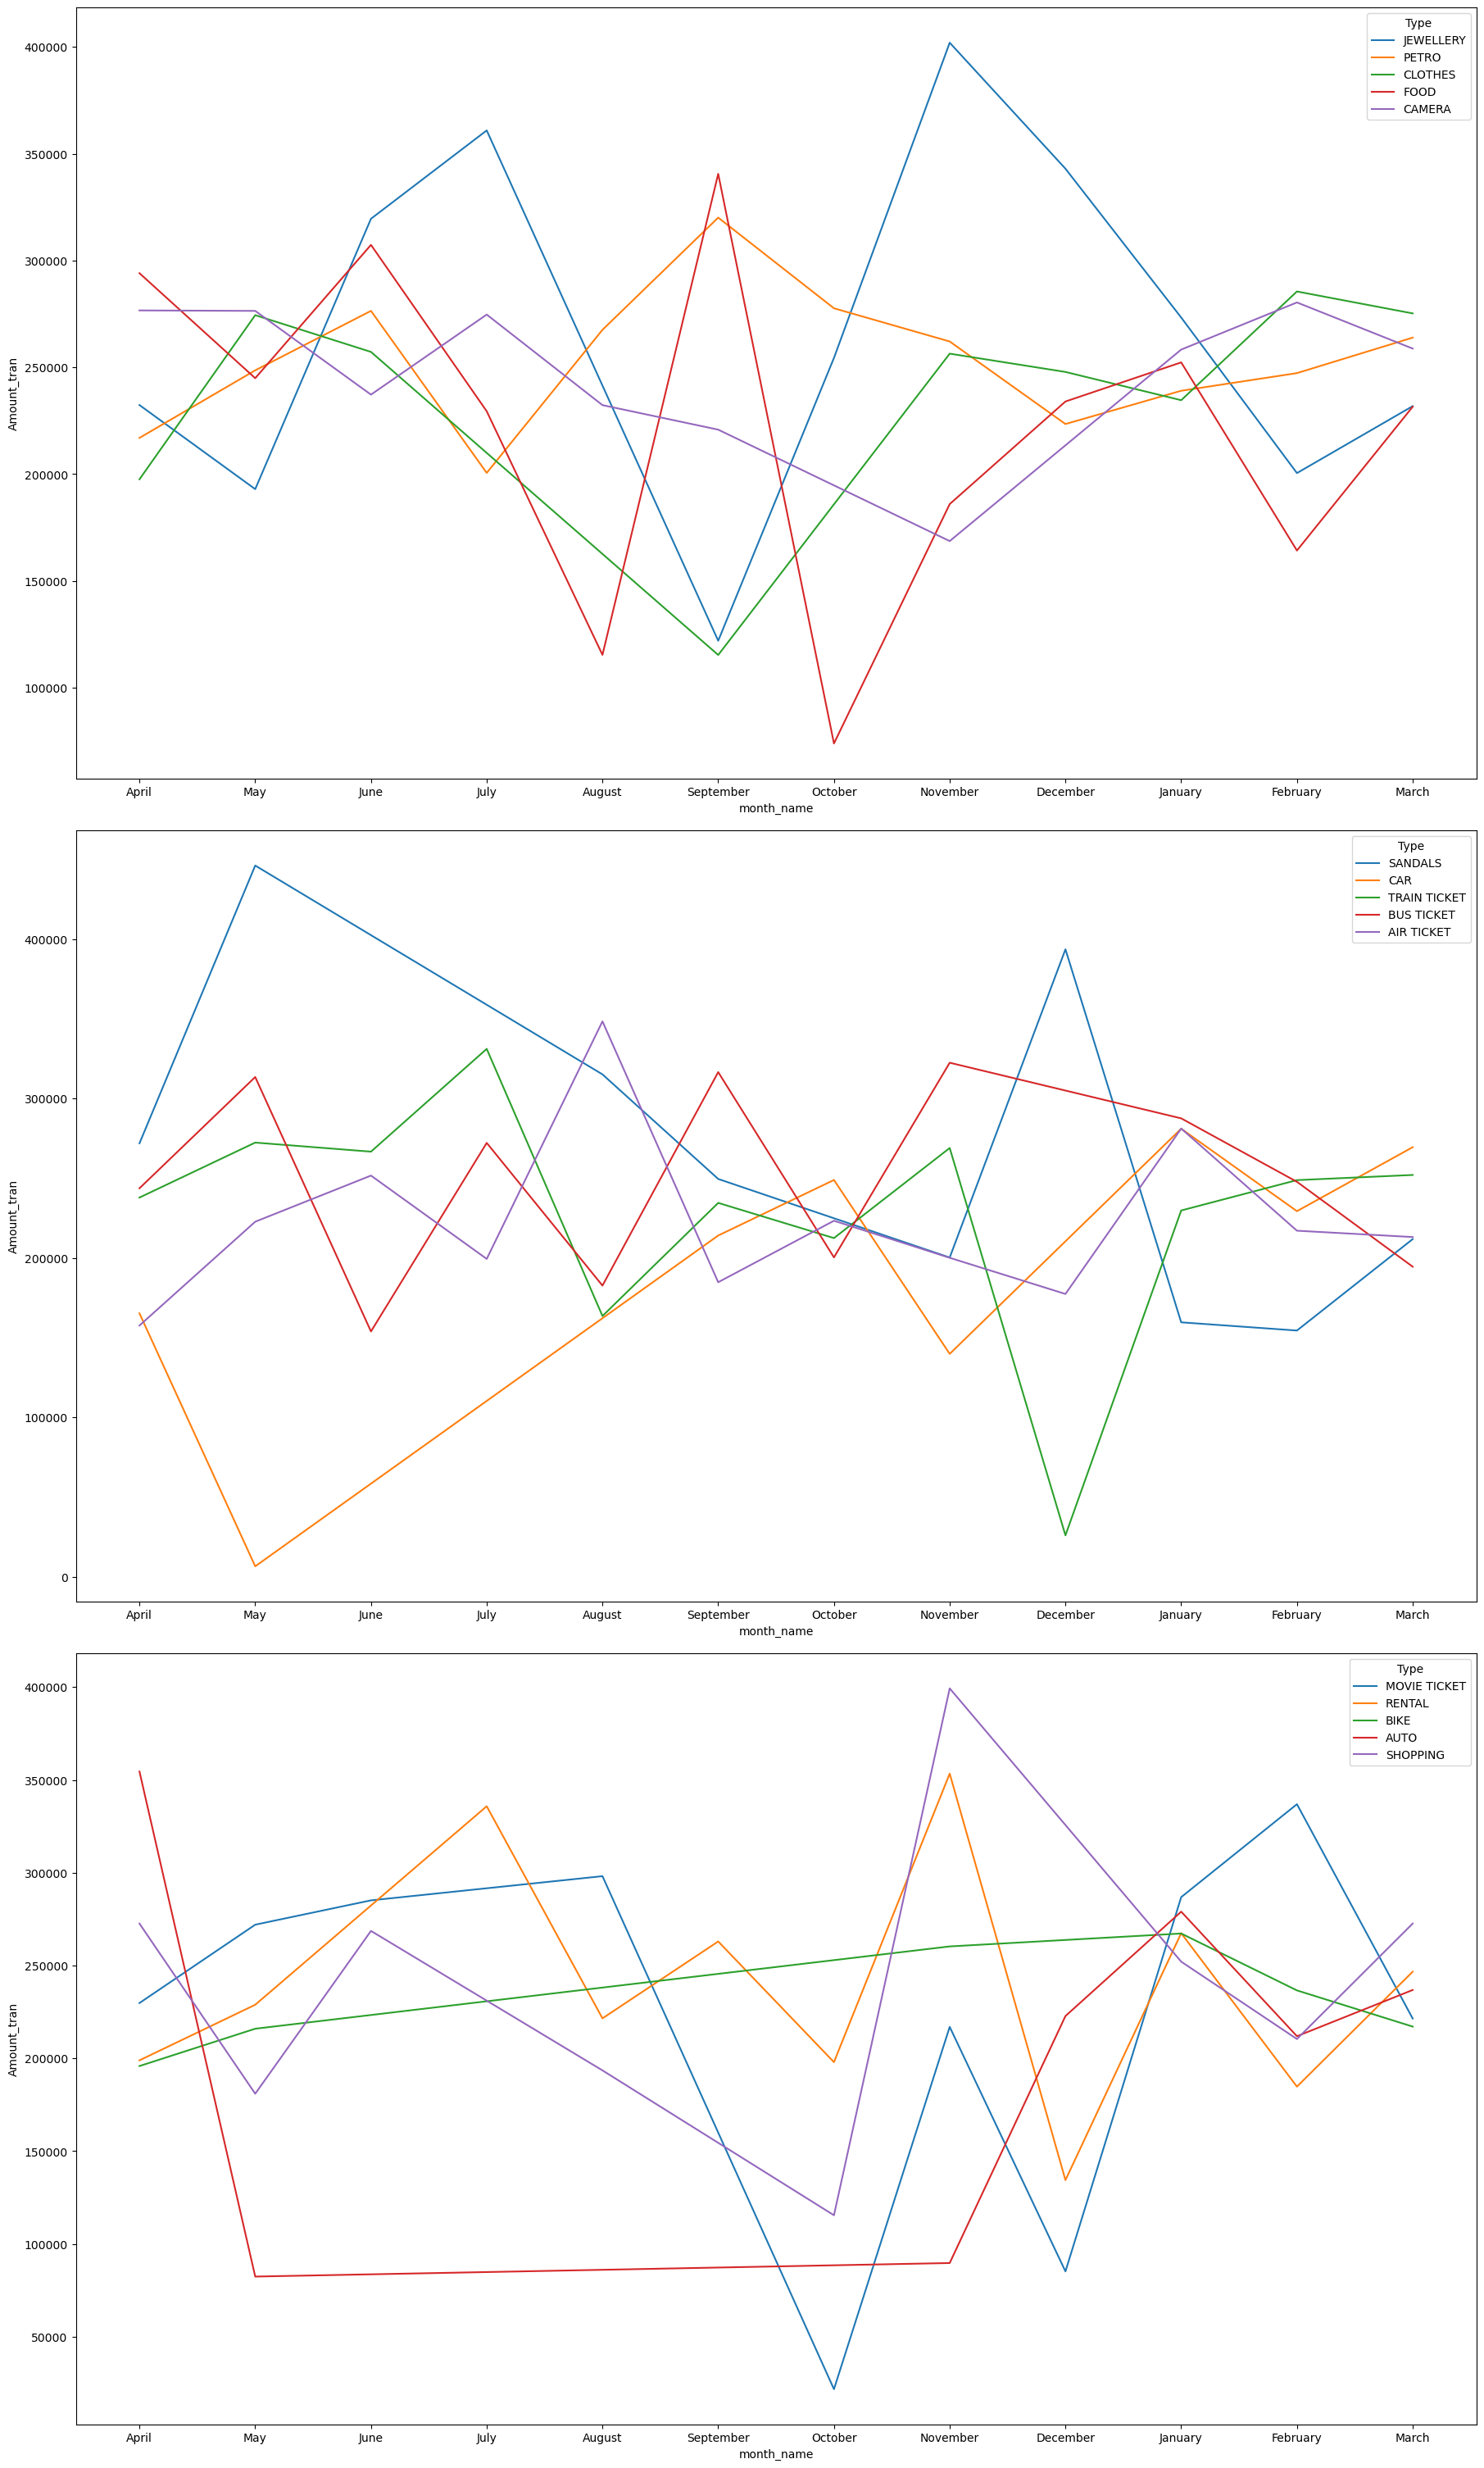

In [155]:
plt.figure(figsize = (18,30),layout ='constrained')

plt.subplot(3,1,1)
sns.lineplot(data=a.astype({'month_name': cat}),x='month_name',y='Amount_tran',hue='Type',errorbar=None)

plt.subplot(3,1,2)
sns.lineplot(data=b.astype({'month_name': cat}),x='month_name',y='Amount_tran',hue='Type',errorbar=None)

plt.subplot(3,1,3)
sns.lineplot(data=c.astype({'month_name': cat}),x='month_name',y='Amount_tran',hue='Type',errorbar=None)
#plt.xticks(rotation=50)

### 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [156]:
merge_rp.pivot_table(index=['year','month_name','City','Customer'],
                     columns='Product',
                     values='Amount_repay',aggfunc='sum')

Product                                  Gold   Platinum     Silver
year month_name City      Customer                                 
2004 April      BANGALORE A14       812582.20        NaN        NaN
                          A18             NaN        NaN  250429.66
                          A23             NaN        NaN  105080.59
                BOMBAY    A12       429751.89        NaN        NaN
                          A36             NaN   63637.32        NaN
...                                       ...        ...        ...
2006 September  COCHIN    A35             NaN  249105.03        NaN
                          A54             NaN  490775.95        NaN
                          A61       117439.14        NaN        NaN
                DELHI     A53             NaN  249254.51        NaN
                PATNA     A46             NaN        NaN   23892.79

[798 rows x 3 columns]

In [157]:
f=merge_rp.pivot_table(index=['Product','City','Customer'],columns=['year','month_name'],
                     values='Amount_repay',aggfunc='sum')
f

year                              2004                                    \
month_name                       April   February     January      March   
Product City       Customer                                                
Gold    BANGALORE  A1              NaN  117964.43  1746418.66        NaN   
                   A13             NaN  269503.29  1627668.57        NaN   
                   A14       812582.20        NaN   993114.87  425031.99   
                   A30             NaN  102510.03   379512.30        NaN   
                   A43             NaN        NaN  1906497.47        NaN   
...                                ...        ...         ...        ...   
Silver  PATNA      A8              NaN  156913.59  1591585.47  371681.75   
                   A84             NaN        NaN         NaN        NaN   
        TRIVANDRUM A57       290318.29  513326.23  1511290.62  207786.09   
                   A68             NaN        NaN   105098.26        NaN   
                   A86             NaN        NaN         NaN        NaN   

year                                                               2005  \
month_name                         May   November  September      April   
Product City       Customer                                               
Gold    BANGALORE  A1              NaN        NaN        NaN        NaN   
                   A13             NaN        NaN  439840.91        NaN   
                   A14       539532.24        NaN        NaN        NaN   
                   A30       496754.84        NaN        NaN        NaN   
                   A43             NaN        NaN        NaN  335534.84   
...                                ...        ...        ...        ...   
Silver  PATNA      A8              NaN  453649.34        NaN        NaN   
                   A84             NaN        NaN        NaN        NaN   
        TRIVANDRUM A57             NaN  209707.13        NaN        NaN   
                   A68             NaN        NaN        NaN        NaN   
                   A86             NaN        NaN        NaN        NaN   

year                                             ...       2006             \
month_name                      August December  ...   December   February   
Product City       Customer                      ...                         
Gold    BANGALORE  A1              NaN      NaN  ...        NaN        NaN   
                   A13       651872.93      NaN  ...        NaN  482074.25   
                   A14             NaN      NaN  ...  388821.96    6804.22   
                   A30             NaN      NaN  ...        NaN  381312.24   
                   A43             NaN      NaN  ...        NaN        NaN   
...                                ...      ...  ...        ...        ...   
Silver  PATNA      A8              NaN      NaN  ...        NaN  490957.38   
                   A84             NaN      NaN  ...        NaN        NaN   
        TRIVANDRUM A57             NaN      NaN  ...  194338.11        NaN   
                   A68             NaN      NaN  ...        NaN        NaN   
                   A86             NaN      NaN  ...        NaN        NaN   

year                                                                      \
month_name                     January       July       June       March   
Product City       Customer                                                
Gold    BANGALORE  A1              NaN        NaN        NaN         NaN   
                   A13             NaN  424603.55  186555.52  1183569.05   
                   A14             NaN   41962.19        NaN  1257854.52   
                   A30             NaN        NaN   72609.24   599331.38   
                   A43             NaN  803935.53   23525.91  1378774.72   
...                                ...        ...        ...         ...   
Silver  PATNA      A8        375175.23        NaN        NaN   187445.35   
                   A84         

In [158]:
f.reset_index(inplace=True)

In [159]:
f

year       Product        City Customer       2004                         \
month_name                                   April   February     January   
0             Gold   BANGALORE       A1        NaN  117964.43  1746418.66   
1             Gold   BANGALORE      A13        NaN  269503.29  1627668.57   
2             Gold   BANGALORE      A14  812582.20        NaN   993114.87   
3             Gold   BANGALORE      A30        NaN  102510.03   379512.30   
4             Gold   BANGALORE      A43        NaN        NaN  1906497.47   
..             ...         ...      ...        ...        ...         ...   
95          Silver       PATNA       A8        NaN  156913.59  1591585.47   
96          Silver       PATNA      A84        NaN        NaN         NaN   
97          Silver  TRIVANDRUM      A57  290318.29  513326.23  1511290.62   
98          Silver  TRIVANDRUM      A68        NaN        NaN   105098.26   
99          Silver  TRIVANDRUM      A86        NaN        NaN         NaN   

year                                                    ...       2006  \
month_name      March        May   November  September  ...   December   
0                 NaN        NaN        NaN        NaN  ...        NaN   
1                 NaN        NaN        NaN  439840.91  ...        NaN   
2           425031.99  539532.24        NaN        NaN  ...  388821.96   
3                 NaN  496754.84        NaN        NaN  ...        NaN   
4                 NaN        NaN        NaN        NaN  ...        NaN   
..                ...        ...        ...        ...  ...        ...   
95          371681.75        NaN  453649.34        NaN  ...        NaN   
96                NaN        NaN        NaN        NaN  ...        NaN   
97          207786.09        NaN  209707.13        NaN  ...  194338.11   
98                NaN        NaN        NaN        NaN  ...        NaN   
99                NaN        NaN        NaN        NaN  ...        NaN   

year                                                                           \
month_name   February    January       July       June       March        May   
0                 NaN        NaN        NaN        NaN         NaN        NaN   
1           482074.25        NaN  424603.55  186555.52  1183569.05        NaN   
2             6804.22        NaN   41962.19        NaN  1257854.52  301965.95   
3           381312.24        NaN        NaN   72609.24   599331.38  988249.64   
4                 NaN        NaN  803935.53   23525.91  1378774.72   93174.27   
..                ...        ...        ...        ...         ...        ...   
95          490957.38  375175.23        NaN        NaN   187445.35  361184.89   
96                NaN        NaN        NaN        NaN   464121.13        NaN   
97                NaN        NaN        NaN        NaN  1214005.58        NaN   
98                NaN        NaN        NaN        NaN         NaN  319836.49   
99                NaN        NaN        NaN        NaN   295851.47        NaN   

year                                      
month_name   November October  September  
0           169358.40     NaN  186427.50  
1           484688.54     NaN        NaN  
2            22692.95     NaN  462300.80  
3                 NaN     NaN   19761.75  
4                 NaN     NaN        NaN  
..                ...     ...        ...  
95                NaN     NaN        NaN  
96                NaN     NaN        NaN  
97                NaN     NaN        NaN  
98                NaN     NaN        NaN  
99                NaN     NaN        NaN  

[100 rows x 33 columns]

In [160]:
f.set_index(['Product','City'],inplace=True)


In [161]:
f

year               Customer       2004                                    \
month_name                       April   February     January      March   
Product City                                                               
Gold    BANGALORE        A1        NaN  117964.43  1746418.66        NaN   
        BANGALORE       A13        NaN  269503.29  1627668.57        NaN   
        BANGALORE       A14  812582.20        NaN   993114.87  425031.99   
        BANGALORE       A30        NaN  102510.03   379512.30        NaN   
        BANGALORE       A43        NaN        NaN  1906497.47        NaN   
...                     ...        ...        ...         ...        ...   
Silver  PATNA            A8        NaN  156913.59  1591585.47  371681.75   
        PATNA           A84        NaN        NaN         NaN        NaN   
        TRIVANDRUM      A57  290318.29  513326.23  1511290.62  207786.09   
        TRIVANDRUM      A68        NaN        NaN   105098.26        NaN   
        TRIVANDRUM      A86        NaN        NaN         NaN        NaN   

year                                                      2005             \
month_name                May   November  September      April     August   
Product City                                                                
Gold    BANGALORE         NaN        NaN        NaN        NaN        NaN   
        BANGALORE         NaN        NaN  439840.91        NaN  651872.93   
        BANGALORE   539532.24        NaN        NaN        NaN        NaN   
        BANGALORE   496754.84        NaN        NaN        NaN        NaN   
        BANGALORE         NaN        NaN        NaN  335534.84        NaN   
...                       ...        ...        ...        ...        ...   
Silver  PATNA             NaN  453649.34        NaN        NaN        NaN   
        PATNA             NaN        NaN        NaN        NaN        NaN   
        TRIVANDRUM        NaN  209707.13        NaN        NaN        NaN   
        TRIVANDRUM        NaN        NaN        NaN        NaN        NaN   
        TRIVANDRUM        NaN        NaN        NaN        NaN        NaN   

year                ...       2006                                   \
month_name          ...   December   February    January       July   
Product City        ...                                               
Gold    BANGALORE   ...        NaN        NaN        NaN        NaN   
        BANGALORE   ...        NaN  482074.25        NaN  424603.55   
        BANGALORE   ...  388821.96    6804.22        NaN   41962.19   
        BANGALORE   ...        NaN  381312.24        NaN        NaN   
        BANGALORE   ...        NaN        NaN        NaN  803935.53   
...                 ...        ...        ...        ...        ...   
Silver  PATNA       ...        NaN  490957.38  375175.23        NaN   
        PATNA       ...        NaN        NaN        NaN        NaN   
        TRIVANDRUM  ...  194338.11        NaN        NaN        NaN   
        TRIVANDRUM  ...        NaN        NaN        NaN        NaN   
        TRIVANDRUM  ...        NaN        NaN        NaN        NaN   

year                                                                     \
month_name               June       March        May   November October   
Product City                                                              
Gold    BANGALORE         NaN         NaN        NaN  169358.40     NaN   
        BANGALORE   186555.52  1183569.05        NaN  484688.54     NaN   
        BANGALORE         NaN  1257854.52  301965.95   22692.95     NaN   
        BANGALORE    72609.24   599331.38  988249.64        NaN     NaN   
        BANGALORE    23525.91  1378774.72   93174.27        NaN     NaN   
...                       ...         ...        ...        ...     ...   
Silver  PATNA             NaN   187445.35  361184.89        NaN     NaN   
        PATNA             NaN   464121.13        NaN        NaN     NaN   
        TRIVANDRUM        NaN  12140

In [162]:
def summary_4(product,city,year,month):
    a=product.capitalize()
    b=city.upper()
    c=int(year)
    d=month.capitalize()
    return f.loc[(a,b),[('Customer',''),(c,d)]]

In [163]:
#UDF
summary_4(product='gold',city='BaNGALORE',year=2005,month='january')

year              Customer       2005
month_name                    January
Product City                         
Gold    BANGALORE       A1  165972.88
        BANGALORE      A13  386518.41
        BANGALORE      A14        NaN
        BANGALORE      A30  228554.19
        BANGALORE      A43   71540.68
        BANGALORE      A63        NaN
        BANGALORE      A81        NaN
        BANGALORE      A88        NaN
        BANGALORE      A92        NaN

In [164]:
#checking
f.loc[('Platinum','BANGALORE'),[('Customer',''),(2005,'April')]]

year               Customer       2005
month_name                       April
Product  City                         
Platinum BANGALORE      A19  463621.90
         BANGALORE      A37   49279.16
         BANGALORE       A5    7276.60
         BANGALORE      A52  186362.03